### This is a python notebook supporting the manuscript entitled, "Single-cell barcode analysis provides a rapid readout of cellular signaling pathways in clinical specimens". This section illustrates code utilized for image segmentation which could be broadly applicable for public use. 

Libraries Utilized

In [408]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd

Load Test Image and common preprocessing

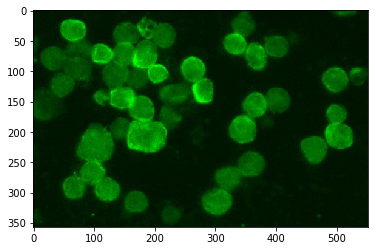

In [409]:
img = cv.imread('S6-1.jpg')
plt.imshow(img)

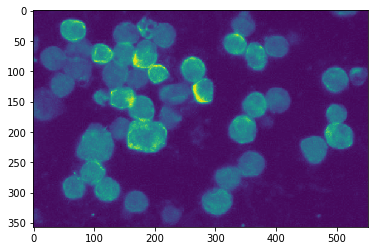

In [410]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

Adaptive thresholding to threshold image based on local characteristics. Specific parameters were defined empircally based on image properties including number of overlaid channels, the nature of the cell staining, amount of background signal, size of cells and other general image characteristics to determine optimal cell segmentation based on human visual analysis. Should be adapted for your specific images. 

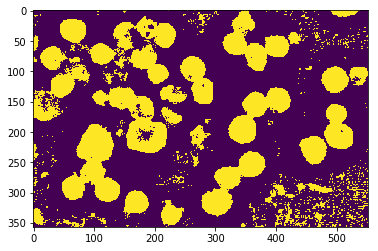

In [411]:
thresh = cv.adaptiveThreshold(gray,255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,111,0)
plt.imshow(thresh)

Noise removal to determine initial cell seedings for watershed based segmentation and determination of initial seedings and background areas. Distance metrics should be adjusted to reflect specific image properties. Metrics utilized here will potentially involve the loss of some cells (with the benefit of a higher level of certainty that objects obtained are true cells) or higher levels of noise (with the benefit of no object loss).  

In [412]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.45*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

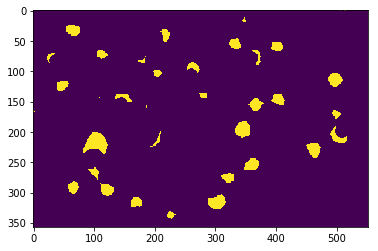

In [413]:
plt.imshow(sure_fg)

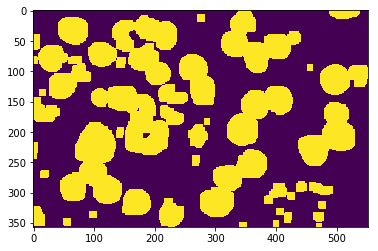

In [414]:
plt.imshow(sure_bg)

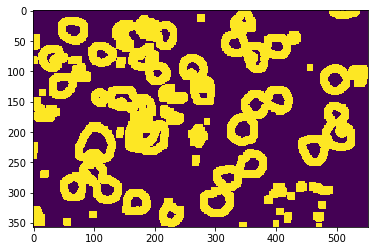

In [415]:
plt.imshow(unknown)

In [416]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [417]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

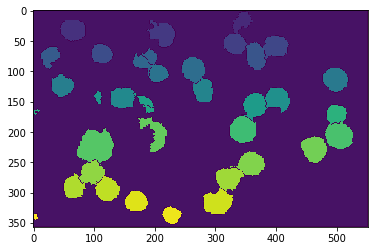

In [418]:
plt.imshow(markers)

Initial segmentation illustrating segmented regions determined to be individual cells. 

Calculate size of individual cells

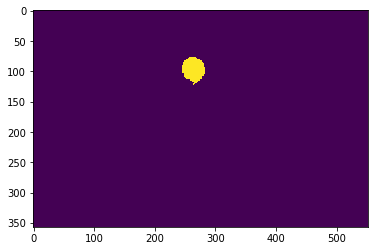

In [419]:
# To find individual cells
l = 14
temp=markers.copy()
temp[markers!=l]=-1
plt.imshow(temp)

Size filtering can be utilized to eliminate remaining errors to ensure pure cell populations. Can also be adapated for items such as aspect ratio etc.

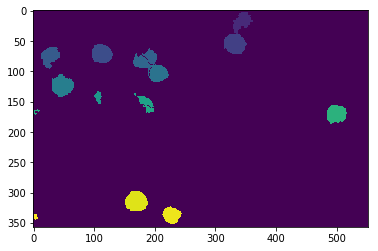

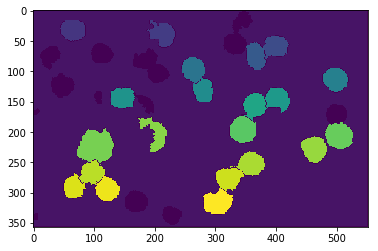

In [420]:
# Size Filtering
region, counts = np.unique(markers, return_counts=True)
minimum_size = 1000
maximum_size = 400000 

counter = 0
for size in counts:
    if size > minimum_size and size < maximum_size:
        counter += 1
        continue
    else:
        region[counter] = -1
        counts[counter] = 0
        counter +=1

size_excluded = markers.copy()
#for marker in markers:
#    if 

#size_excluded[markers in region] = -1
#plt.imshow(size_excluded)
region = set(region)
region = list(region)

# Display only small objects
test = np.isin(size_excluded, region)
size_excluded[test != False] = -1
plt.imshow(size_excluded)
plt.show()
size_excluded = markers.copy()

# Display only remaining objects
test = np.isin(size_excluded, region)
size_excluded[test != True] = -1 # Set to background
plt.imshow(size_excluded)

Extract intensities of each region from individual cells

In [421]:
for cell in region:
    l = cell
    temp=markers.copy()
    temp[markers!=l]=-1

    mask = temp.copy()
    mask[mask > 1] = 255
    mask[mask < 1] = 0
    mask = np.uint8(mask)
    mean_val = cv.mean(gray, mask = mask)
    print(mean_val)

(20.170130750605328, 0.0, 0.0, 0.0)
(86.99042645778938, 0.0, 0.0, 0.0)
(55.3992, 0.0, 0.0, 0.0)
(50.561357702349866, 0.0, 0.0, 0.0)
(74.59341637010677, 0.0, 0.0, 0.0)
(84.8172131147541, 0.0, 0.0, 0.0)
(62.37983870967742, 0.0, 0.0, 0.0)
(96.03769841269842, 0.0, 0.0, 0.0)
(94.57688888888889, 0.0, 0.0, 0.0)
(49.70558375634518, 0.0, 0.0, 0.0)
(74.86527666399358, 0.0, 0.0, 0.0)
(76.12368421052632, 0.0, 0.0, 0.0)
(77.97571884984026, 0.0, 0.0, 0.0)
(68.18393068137061, 0.0, 0.0, 0.0)
(91.39238410596026, 0.0, 0.0, 0.0)
(61.79638989169675, 0.0, 0.0, 0.0)
(52.24666666666667, 0.0, 0.0, 0.0)
(75.60286677908938, 0.0, 0.0, 0.0)
(57.228070175438596, 0.0, 0.0, 0.0)
(64.56706114398422, 0.0, 0.0, 0.0)
(73.88769611890999, 0.0, 0.0, 0.0)
(68.08704318936877, 0.0, 0.0, 0.0)
(0.0, 0.0, 0.0, 0.0)
